In [1]:
import pandas as pd
import re
from unidecode import unidecode 
from spacy.lang.pt.stop_words import STOP_WORDS
from nltk.corpus import stopwords 
import nltk
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

## Importando base

In [2]:
df = pd.read_pickle('input/songs.pkl')

In [3]:
df.shape

(11030, 8)

## Funções 

In [22]:
def transform_text(tokens):
    # html transform
    tokens = tokens.replace('<div data-plugin="googleTranslate" id="lyrics">', '').replace('</div>', '').replace('<br/>', " ")
    # stop words
    stop_words_ = STOP_WORDS.union(stopwords.words('portuguese'))
    stop_words = [unidecode(stop).lower() for stop in stop_words_]
    # Split to translate
    tokens = tokens.split()
    # Concatenate
    tokens = ' '.join(tokens)
    # Remove accents
    tokens = unidecode(tokens)
    # Remove https, mentions, special characters, single character
    tokens = re.sub("(@[A-Za-z0-9]+)|(_[A-Za-z0-9]+)|(\w+:\/\/\S+)|(\W_)", " ", tokens).lower()
    # Remove pontuaction
    tokens = re.sub('['+string.punctuation+']', '', tokens)
    # Substituting multiple spaces with single space
    tokens = re.sub(r'\s+', ' ', tokens, flags=re.I)
    # Remove digits
    tokens = ''.join([i for i in tokens if not i.isdigit()])
    # Remove all single characters
    tokens = re.sub(r'\s+[a-zA-Z]\s+', ' ', tokens)
    # Split
    tokens = tokens.split()
    # Stopwords
    tokens = [w for w in tokens if w not in stop_words]
    # Concatenate
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist

## Aplicando tratamento de texto

In [6]:
%%time
df['Transformed'] = df['lyrics'].apply(lambda x: transform_text(x))

CPU times: user 18.1 s, sys: 2.2 s, total: 20.3 s
Wall time: 20.7 s


## Filtrando apenas músicas brasileiras

In [8]:
# Considerando apenas músicas brasileiras
df_br = df[df['is_pt'] != 'Tradução ']

## Análise descritiva

<AxesSubplot:>

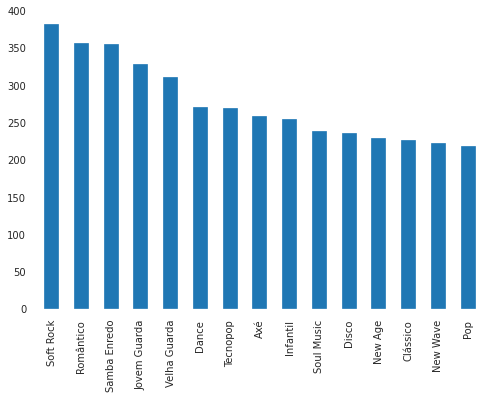

In [33]:
df['category'].value_counts().head(15).plot.bar()

## Avaliando palavras

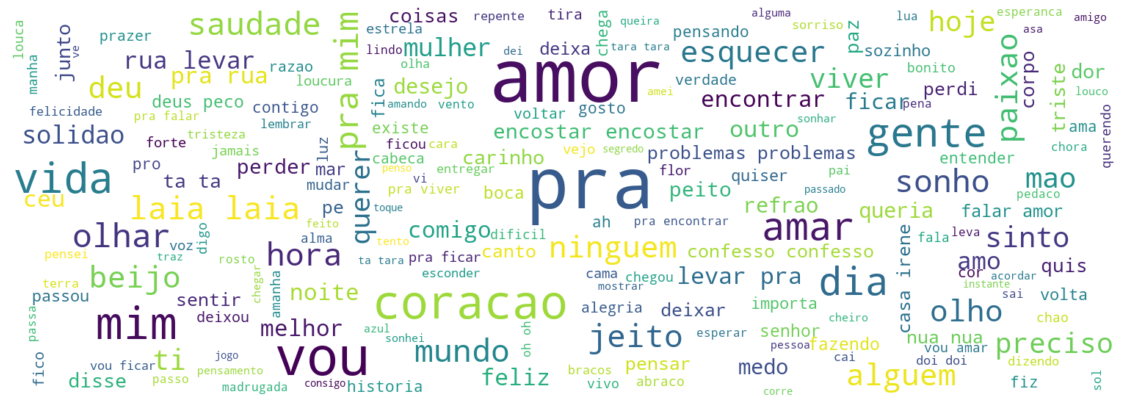

In [38]:
plt.figure(figsize = (20,20)) 
text = " ".join(review for review in df_br[(df_br['is_pt'] != 'Tradução ') & (df_br['category'] == 'Romântico')]['Transformed'])
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show()

## Diferentes estilos de musicas contém letras menores?

In [25]:
%%time
df_br['Reduce'] = df_br['Transformed'].apply(lambda x: ' '.join(unique_list(x.split())))
df_br['len'] = df_br['Reduce'].apply(lambda x: len(x))

CPU times: user 156 ms, sys: 0 ns, total: 156 ms
Wall time: 160 ms


<AxesSubplot:ylabel='Frequency'>

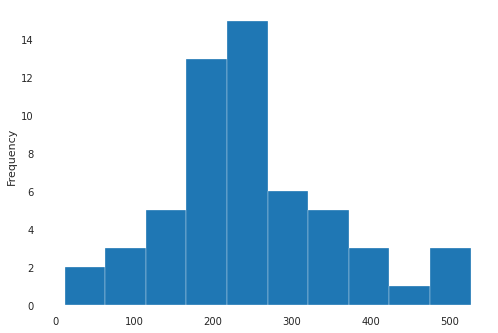

In [41]:
df_br[df_br['category']=='Pop']['len'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

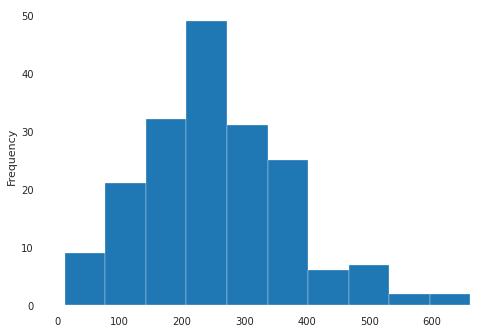

In [27]:
df_br[df_br['category'] == 'MPB']['len'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

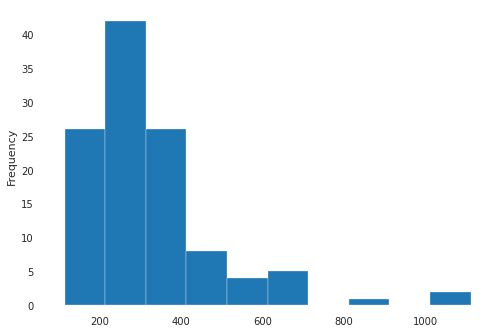

In [28]:
df_br[df_br['category'] == 'Sertanejo']['len'].plot.hist()